<a href="https://colab.research.google.com/github/DawidK4/MyNotebooks/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/iris.csv', header=None, names=['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class'])
print(df.shape)
df.head(10)
# df.info()

(150, 5)


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Text(0.5, 1.0, 'Correlation Matrix of Iris')

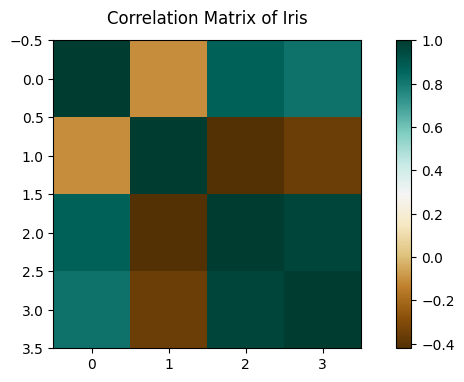

In [ ]:
iris_features = df.drop('class', axis=1)
correlation_matrix = iris_features.corr()
plt.figure(figsize=(9, 4))
plt.imshow(correlation_matrix, cmap='BrBG')
plt.colorbar()
plt.title('Correlation Matrix of Iris', fontdict={'fontsize':12}, pad=12)

Text(0, 0.5, 'Petal Length')

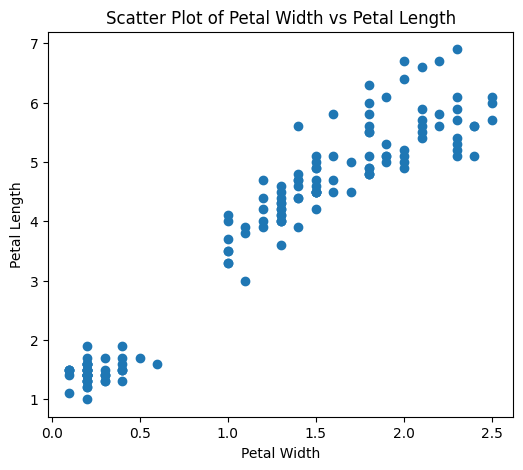

In [ ]:
petal_width_list = df['petal_width'].to_list()
petal_len_list = df['petal_len'].to_list()
plt.figure(figsize=(6, 5))
plt.scatter(petal_width_list, petal_len_list)
plt.title('Scatter Plot of Petal Width vs Petal Length')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

<Figure size 1000x500 with 0 Axes>

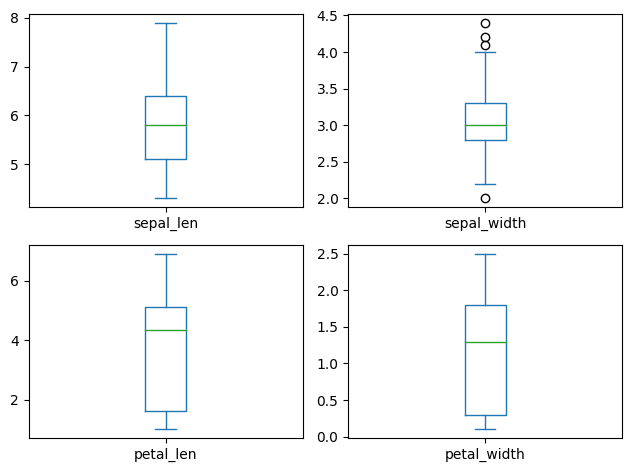

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
iris_features.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=50, random_state=50, shuffle=True)

X_train = train.iloc[:, :4]
y_train = train.iloc[:, 4:]
X_test = test.iloc[:, :4]
y_test = test.iloc[:, 4:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100, 1)
(50, 4)
(50, 1)


In [ ]:
from re import A
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.98
F1 Score: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1, 10)}
# print(param_grid)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train.values.ravel())

# results = grid_search.cv_results_
# results_df = pd.DataFrame(results)
# print(results_df)

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Score: {mean_score}, Params: {params}")

best_k = grid_search.best_params_['n_neighbors']

# best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

Mean Score: 0.9600000000000002, Params: {'n_neighbors': 1}
Mean Score: 0.9399999999999998, Params: {'n_neighbors': 2}
Mean Score: 0.96, Params: {'n_neighbors': 3}
Mean Score: 0.96, Params: {'n_neighbors': 4}
Mean Score: 0.96, Params: {'n_neighbors': 5}
Mean Score: 0.95, Params: {'n_neighbors': 6}
Mean Score: 0.95, Params: {'n_neighbors': 7}
Mean Score: 0.96, Params: {'n_neighbors': 8}
Mean Score: 0.95, Params: {'n_neighbors': 9}
Best k value: 1


Gaussian Naive Bayes is used when features are continous and follow normal distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train.values.ravel())
y_pred = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred, average='weighted')

print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Naive Bayes F1 Score: {f1_nb}')

Naive Bayes Accuracy: 0.96
Naive Bayes F1 Score: 0.96
